In [547]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [548]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [549]:
transactions = pd.read_csv("/content/drive/MyDrive/Data/transactions.csv", nrows=1000000, sep=",")
tr_types=pd.read_csv("/content/drive/MyDrive/Data/tr_types.csv", sep=";")
gender_train=pd.read_csv("/content/drive/MyDrive/Data/gender_train.csv", sep=",")
tr_mcc_codes=pd.read_csv("/content/drive/MyDrive/Data/tr_mcc_codes.csv", sep=";")

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [550]:
samples_count = 1000
tr_type_sample = transactions["tr_type"].sample(samples_count)
pattern = (tr_types["tr_description"].str.contains("АТМ")) | (tr_types["tr_description"].str.contains("POS"))
types_with_pattern_description = tr_types["tr_type"][pattern]
count_values_by_pattern = tr_type_sample.isin(types_with_pattern_description).value_counts()[True]
count_values_by_pattern / samples_count

0.614

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [551]:
top_ten_transactions = transactions["tr_type"].value_counts().sort_values(ascending=False).head(10)
tr_types[tr_types["tr_type"].isin(top_ten_transactions.index)]

,tr_type,tr_description
39,7010,Взнос наличных через АТМ (в своем тер.банке)
47,7030,Перевод на карту (с карты) через АТМ (в предел...
59,7070,Перевод на карту (с карты) через Мобильный бан...
60,7071,Перевод на карту (с карты) через Мобильный бан...
98,1010,Покупка. POS ТУ СБ РФ
99,1030,Оплата услуги. Банкоматы СБ РФ
100,1100,Покупка. ТУ Россия
101,1110,Покупка. POS ТУ Россия
106,2010,Выдача наличных в АТМ Сбербанк России
129,2370,Списание с карты на карту по операции <перевод...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [552]:
customers_with_amount = transactions[["customer_id", "amount"]]

In [553]:
selected_customers_with_amount = customers_with_amount[customers_with_amount["amount"] > 0]
group_customers_by_amount = selected_customers_with_amount.groupby("customer_id").sum()
high_amount_customer = group_customers_by_amount.idxmax().item()
high_amount = abs(group_customers_by_amount.max().item())
high_amount_customer

70780820

In [554]:
selected_customers_with_amount = customers_with_amount[customers_with_amount["amount"] <= 0]
group_customers_by_amount = selected_customers_with_amount.groupby("customer_id").sum()
low_amount_customer = group_customers_by_amount.idxmin().item()
low_amount = abs(group_customers_by_amount.min().item())
low_amount_customer

70780820

In [555]:
low_amount - high_amount

1837317.979973793

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [556]:
top_ten_transactions = transactions[transactions["tr_type"].isin(list(top_ten_transactions.index))]
mean = top_ten_transactions.groupby("tr_type")["amount"].mean()
median = top_ten_transactions.groupby("tr_type")["amount"].median()
pd.concat([mean, median], axis=1, keys=["Mean", "Median"])

,Mean,Median
tr_type,,
1010,-19784.748640,-7411.52
1030,-5320.980222,-2245.92
1100,-44061.827262,-10188.26
1110,-32119.330371,-11207.57
2010,-136077.629325,-44918.32
2370,-205418.249032,-44918.32
7010,276391.789596,112295.79
7030,86104.332909,13951.52
7070,65569.831700,11319.42


In [557]:
customer_transactions = transactions.loc[transactions["customer_id"] == high_amount_customer]
mean = customer_transactions.groupby("tr_type")["amount"].mean()
median = customer_transactions.groupby("tr_type")["amount"].median()
pd.concat([mean, median], axis=1, keys=["Mean", "Median"])

,Mean,Median
tr_type,,
2010,-2.941056e+06,-3368873.660
2330,-2.382398e+06,-2245915.770
2370,-2.218505e+06,-2245915.770
6110,1.756293e+04,10028.010
7020,1.465129e+04,10319.985
7021,2.850067e+04,28500.670
7030,1.406196e+04,8848.910
7031,1.921036e+04,12992.620
7034,1.430648e+04,14306.480


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [558]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [559]:
negative_trasactions_grouped_by_gender = transactions[transactions["amount"] < 0].groupby("gender")["amount"].mean()
abs(negative_trasactions_grouped_by_gender[0] - negative_trasactions_grouped_by_gender[1])

32718.05492021877

In [560]:
positive_trasactions_grouped_by_gender = transactions[transactions["amount"] >= 0].groupby("gender")["amount"].mean()
abs(positive_trasactions_grouped_by_gender[0] - positive_trasactions_grouped_by_gender[1])

63366.57104801515

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [561]:
max_income = transactions[transactions["amount"] > 0].groupby(["gender", "tr_type"])["amount"].sum()
max_ten_income_zero_gender = max_income[0].sort_values().head(10)
max_ten_income_zero_gender

tr_type
4051     1122.96
4210     2245.92
4110     2245.92
2370     2335.75
7075     6737.75
2110    22459.16
1010    31532.66
4100    40334.88
2210    68315.82
1210    83644.87
Name: amount, dtype: float64

In [562]:
max_ten_income_one_gender = max_income[1].sort_values().head(10)
max_ten_income_one_gender

tr_type
2020      2245.92
4110      4491.84
1010     35317.03
8100     64682.37
6000     79280.83
7041     87590.72
2370    113194.15
7015    121279.45
2110    179673.26
2010    224591.59
Name: amount, dtype: float64

In [563]:
#2ой пункт не сделан

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [564]:
sum_expenses_groupby_mcc_gender = transactions[transactions["amount"] < 0].groupby(["gender", "mcc_code"])["amount"].sum()
sum_expenses_groupby_mcc_gender

gender  mcc_code
0.0     742          -386207.68
        1711         -674897.69
        1799         -261626.73
        2741          -20746.42
        3000       -74431645.27
                       ...     
1.0     8999       -28643346.63
        9222         -988205.17
        9311         -373271.22
        9399        -1810820.67
        9402           -4581.67
Name: amount, Length: 349, dtype: float64

In [565]:
top_modulo_expenses = abs(sum_expenses_groupby_mcc_gender[0] - sum_expenses_groupby_mcc_gender[1]).sort_values(ascending=False).head(10)
tr_mcc_codes[tr_mcc_codes["mcc_code"].isin(top_modulo_expenses.index)]

,mcc_code,mcc_description
22,4829,Денежные переводы
62,5511,"Легковой и грузовой транспорт — продажа, серви..."
64,5533,Автозапчасти и аксессуары
65,5541,Станции техобслуживания
75,5661,Обувные магазины
90,5812,"Места общественного питания, рестораны"
116,5977,Магазины косметики
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...
162,7995,Транзакции по азартным играм


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [566]:
transactions[["tr_day", "tr_time"]] = transactions["tr_datetime"].str.split(" ", expand=True)
transactions[["tr_hour", "tr_minute", "tr_second"]] = transactions["tr_time"].str.split(":", expand=True)
transactions["tr_hour"]

0         10
1         07
2         07
3         08
4         14
          ..
999579    23
999580    19
999581    22
999582    23
999583    23
Name: tr_hour, Length: 999584, dtype: object

In [567]:
pattern = ((transactions["amount"] < 0) & (transactions["tr_hour"].astype(int) <= 6))
transaction_count_groupby_gender_with_pattern = transactions[pattern].groupby("gender")["amount"].count()
transaction_count_groupby_gender_with_pattern

gender
0.0    43510
1.0    46694
Name: amount, dtype: int64

#Защита
По заданию 8. Найдите среднее количество транзакций с amount < 0 каждые 10 минут и постройте график. 
На графике выделите отдельно представителей разных полов.

In [602]:
transactions["raw_datetime"] = transactions["tr_datetime"].str.replace(" ", "")
transactions["date"] = transactions["raw_datetime"].str.replace(":", "").astype(int)
transactions = transactions[transactions["amount"] < 0]
transaction_count_ordered_by_gender_minutes = transactions.groupby([transactions["gender"],transactions["date"] // 1000])["tr_type"].count()
# Почему 1000 так как мы убрали ":"" то будем число например 2100200 (т.е 2ой день 10ый час 02 минута 00 секунда) делить нацело на 1000 (10 минут 00 секунд)
gender_zero = transaction_count_ordered_by_gender_minutes[0].reset_index()
gender_one = transaction_count_ordered_by_gender_minutes[1].reset_index()

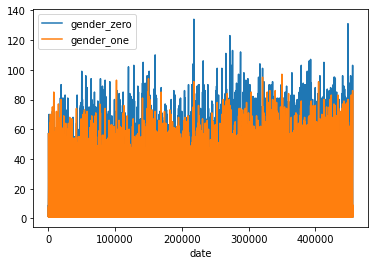

In [605]:
ax = gender_one.plot(x="date", y="tr_type", label="gender_zero")
gender_zero.plot(x="date", y="tr_type", ax=ax, label="gender_one")